# Movie Recommender System with Spark MLlib

In this [Jupyter](http://jupyter.org/) notebook, we will learn a bit about [Apache Spark](http://spark.apache.org/), then, we will use Spark and the MLlib library to build a recommender system from [MovieLens](https://movielens.org/) latest dataset.

[MovieLens](https://movielens.org/) is a project developed by [GroupLens](https://grouplens.org/), a research laboratory at University of Minnesota. The idea is to provide an online movie recommender application and use the anonymously collected data to improve recommender algorithms. On [MovieLens](https://movielens.org/), anyone can try the app for free and get movies recommandations. To help people develop the best recommendation algorithms, MovieLens also released several datasets on [MovieLens DataSets](http://grouplens.org/datasets/movielens/). In this notebook, we will use the [MovieLens latest released datasets](https://grouplens.org/datasets/movielens/latest/).

To get an idea about the data volumes, the latest dataset consists of more than 24M ratings across more than 40k movies by more than 250k users. The release that is used in this notebook was built on October 18, 2016. A smaller dataset, a subset of the previous one, containing around 100k ratings about 9k movies by 650 users is also made available in the exact same format. It is generally a good idea to first build a working program using a smaller dataset to get best performance while interacting, exploring and getting errors. Once you have a fully working program, you can apply the exact same code to a much bigger dataset, possibly on a much bigger cluster of machines. Limit data volume as much as possible, for example using indexes rather than full string names is also a good idea to minimize memory consumption. This technique helps this 24M ratings file stay under 1GB.

To analyze the data with Data Science Experience, you were automatically provided with an [Apache Spark](https://console.ng.bluemix.net/catalog/services/apache-spark/) and a [Bluemix Object Storage](https://console.ng.bluemix.net/catalog/services/object-storage/) services on [Bluemix](https://console.ng.bluemix.net/). The Bluemix Object Storage service relies on the open-source [OpenStack Swift](http://docs.openstack.org/developer/swift/) object storage and you can store up to 5GB of data for free. To explore the content of this Object Storage, you can expand the left pane menu by clicking on the top left hamburger and go to Object Storage. A container has automatically been created for your DefaultProject and you can upload files to this container to use those data into your project. The Apache Spark service comes with 2 Spark executors in its free version but is also available with far more executors for paying customers. You can get more information about those services on your [Bluemix dashboard](https://console.ng.bluemix.net/dashboard/apps).

The current development environment is an open-source [Jupyter](http://jupyter.org/) notebook. A notebook consists of cells that could be either **Code** cells or **Markdown** cells. Markdown is a lightweight markup language with plain text formatting syntax. You can double click this Markdown cell to see the *code*. Then, press **CTRL + ENTER**, or press the **Run Cell** button in the menu bar to execute it. [Here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) is a simple Markdown cheat sheet to introduce you to this markup language. The other cell format that is available to you is the **Code** format where you can write code in the kernel language you chose. The kernel language is selected at notebook creation and can be later modified in the `Kernel -> Change kernel` menu. You can insert new cells anywhere in the notebook by pressing the **+** button in the top bar.

At the top right, you can also notice your kernel language comes with a version of Spark. [Apache Spark](https://console.ng.bluemix.net/catalog/services/apache-spark/) is an **open-source** **in-memory** application **framework** for **distributed** data processing and **iterative** analysis on **massive** data volumes that we will use in this notebook. At time of writing, the current Spark version is 2.0.2. You can find useful information about the Python interface in the [Spark Python documentation](http://spark.apache.org/docs/2.0.2/api/python/index.html).

The main files of interest in the [MovieLens latest released datasets](https://grouplens.org/datasets/movielens/latest/) for this notebook are `movies.csv` and `ratings.csv`.

## Agenda

1. [Load the data](#1.-Load-the-data)
2. [Spark basics](#2.-Spark-basics)
3. [SparkSQL and the DataFrame API](#3.-SparkSQL-and-the-DataFrame-API)
4. [Visualize the data](#4.-Visualize-the-data)
5. [The recommender system](#5.-The-recommender-system)
6. [Deal with unstructured data](#6.-Deal-with-unstructured-data)
7. [To continue your journey with Spark](#7.-To-continue-your-journey-with-Spark)

## 1. Load the data
[Back to the Agenda](#Agenda)

Spark lets you explore data of any structure from a lot of different data sources and data formats.  
Data could be structured, semi-structured or unstructured.   
The formats could be either JSON, Parquet, CSV, ORC or any specific format.  
They can come from a local or remote file system, a distributed file system such as HDFS, an object store such as Amazon S3 or OpenStack Swift or any JDBC compatible database.

For this notebook, we will use the Bluemix Object Storage that was automatically configured with Data Science Experience.  
By clicking on the **Find an Add Data** button at the top right menu bar (represents 1001 numbers), you can open a side bar that lists the files in the container configured for this project. It will probably be empty, the first time you open it. You can drag and drop files, one by one, or select the **browse** link to choose the file you want to upload from your local machine. Alternatively, the more complete interface that is available from the left pane hamburger menu **Object Storage** lets you upload multiple files at a time.

The requirement for this notebook is to have the small latest dataset uploaded. Downloading and uploading the bigger dataset may take a lot of time depending on the network configuration. There is an alternative to upload directly the dataset from GroupLens servers to your Data Science Experience environment without having to make the files pass through your local computer but this won't be detailed in this notebook. An other alternative is to access the biggest dataset from an already configured Object Storage!

Once you have your small MovieLens dataset visible in the right data pane, be sure to add an empty cell under this one and to select it before clicking on the `movies.csv` dataset **Insert to code** related link and choosing **Insert SparkSession DataFrame**. Spark DataFrames are really similar to R or Pandas DataFrames except they can be distributed on a cluster of Spark executors, possibly on a cluster of thousands machines. DataFrames are one of the easiest and most performant way of manipulating data in Spark but they only accept structured data coming from formats and sources such as CSV, Parquet, JSON or JDBC.

The above procedure should fill the following cell with a code snippet configuring the access to your data source - in this case, the DSX integrated Object Storage - and setting a new variable `df_data_x` to access the content of this data file through a Spark DataFrame.

In [21]:
# Click the following line into this cell before selecting movies.csv > Insert to code > Insert SparkSession DataFrame









[Row(movieId=u'1', title=u'Toy Story (1995)', genres=u'Adventure|Animation|Children|Comedy|Fantasy'),
 Row(movieId=u'2', title=u'Jumanji (1995)', genres=u'Adventure|Children|Fantasy'),
 Row(movieId=u'3', title=u'Grumpier Old Men (1995)', genres=u'Comedy|Romance'),
 Row(movieId=u'4', title=u'Waiting to Exhale (1995)', genres=u'Comedy|Drama|Romance'),
 Row(movieId=u'5', title=u'Father of the Bride Part II (1995)', genres=u'Comedy')]

Note that this cell contains an #hidden_cell tag that prevents your private Object Storage credentials to be shared when you share this notebook with people outside the scope of your project through the sharing feature. Be aware that at time of writing, this tag does NOT prevent those cells to be published when you publish your notebook on GitHub! This should be fixed soon. Look at the `spark.read` code block. This is where the data are loaded from your OpenStack Swift container. The [Uniform Resource Identifier](https://fr.wikipedia.org/wiki/Uniform_Resource_Identifier) (URI) `swift://<container_name>.<keystone>/<file_name>` gives access to your data repository:

- `<keystone>` describes the connexion parameters (username, password, API endpoint, etc.) ;
- `<container_name>` defines the container where you store the data, that was defined at DSX project creation ;
- `<file_name>` finaly is the name of the file or files you want to access.

It is a good idea to store those values in common variables so you can follow the given examples later.

In [22]:
container_name = 'SparkLessons' # Replace with your own container name that you defined at project creation, you can retrieve it by inserting credentials from one of your file
movies_file_name = 'MovieLens-Small-movies.csv' # Replace with the name of your movies.csv file
ratings_file_name = 'MovieLens-Small-ratings.csv' # Replace with the name of your ratings.csv file

Also remember that any Spark session needs a SparkContext or SparkSession instance to submit jobs to an executors cluster. On this Bluemix environment you were provided a 2 executors Spark cluster for free and a SparkContext is already available as **sc**. A SparkSession was also made available in the previous cell through the **spark** variable. You can refer to the [Spark Python API documentation](http://spark.apache.org/docs/2.0.2/api/python/index.html) and more specifically the [SparkContext](http://spark.apache.org/docs/2.0.2/api/python/pyspark.html#pyspark.SparkContext) and SQLContext/[SparkSession](http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.SparkSession) sections to learn about the methods you can call on the **sc** and **spark** instances. Also be aware that Spark is written in Scala and thus the [Scala documentation](http://spark.apache.org/docs/2.0.2/api/scala/#package) stays the more current and detailed documentation. Below are some examples to get the Spark version running on your environment, the default parallelism factor or details about the Spark configuration.

In [23]:
print spark.version

2.0.2


In [24]:
print sc.defaultParallelism

7


In [25]:
print sc.getConf().toDebugString()

hive.metastore.warehouse.dir=file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/s82f-d9fac7c675f5ac-a43fa23db6d2/notebook/work/spark-warehouse
spark.app.id=app-20170130150625-0035-7e5feb8b-729d-4e7f-9d77-56231144632a
spark.app.name=PySparkShell
spark.deploy.resourceScheduler.factory=org.apache.spark.deploy.master.EGOResourceSchedulerFactory
spark.driver.host=10.143.133.25
spark.driver.maxResultSize=1210M
spark.driver.memory=1512M
spark.driver.port=35917
spark.eventLog.dir=/gpfs/fs01/user/s82f-d9fac7c675f5ac-a43fa23db6d2/events
spark.eventLog.enabled=true
spark.executor.extraJavaOptions=-Djava.security.egd=file:/dev/./urandom
spark.executor.id=driver
spark.executor.memory=6G
spark.extraListeners=com.ibm.spaas.listeners.DB2DialectRegistrar
spark.history.fs.logDirectory=/gpfs/fs01/user/s82f-d9fac7c675f5ac-a43fa23db6d2/events
spark.logConf=true
spark.master=spark://yp-spark-dal09-env5-0040:7085
spark.port.maxRetries=512
spark.r.command=/usr/local/src/bluemix_jupyter_bundle.v33/R/bin/Rscrip

You can follow the exact same steps as mentioned in the above section to load the `ratings.csv` file in another Spark DataFrame.

In [26]:
# Click the following line into this cell before selecting ratings.csv > Insert to code > Insert SparkSession DataFrame










[Row(userId=u'1', movieId=u'31', rating=u'2.5', timestamp=u'1260759144'),
 Row(userId=u'1', movieId=u'1029', rating=u'3.0', timestamp=u'1260759179'),
 Row(userId=u'1', movieId=u'1061', rating=u'3.0', timestamp=u'1260759182'),
 Row(userId=u'1', movieId=u'1129', rating=u'2.0', timestamp=u'1260759185'),
 Row(userId=u'1', movieId=u'1172', rating=u'4.0', timestamp=u'1260759205')]

For conveniance, we'll call those Spark DataFrames `movies` and `ratings`. **Feel free to change their names in the above code snippets to match the one given in the following steps**. Execute the following cell to be sure the data access is working fine and you have accurately use the **movies** and **ratings** variable names.

In [27]:
print movies.first()
print ratings.first()

Row(movieId=u'1', title=u'Toy Story (1995)', genres=u'Adventure|Animation|Children|Comedy|Fantasy')
Row(userId=u'1', movieId=u'31', rating=u'2.5', timestamp=u'1260759144')


Notice that we are specifying an action - **first()** - to test the data access. Just using the **load()** method won't be sufficient because **load()** is a transformation in Spark terminology. As Spark is working in a lazy evaluation mode, it won't execute anything until an actual action awaiting a physical result is specified. When transformations are specified, Spark only builds the Directed Acyclic Graph representing its execution plan. Execution only takes place when an action is given, such as **first()**.

You also have to know that the more generic Datasets and DataFrames (that are Dataset[Row]) rely on the primary user-facing API that is available in Spark since its inception: the RDD which stands for Resilient Distributed Dataset and is fundamentally an immutable distributed collection of elements partitioned over the Spark executors that are available to your Spark application. At any time, you can access the underlying RDD of a DataFrame or Dataset by calling the **.rdd** method.

In [28]:
movies.rdd.first()

Row(movieId=u'1', title=u'Toy Story (1995)', genres=u'Adventure|Animation|Children|Comedy|Fantasy')

The main difference between RDDs and DataFrames is that a DataFrame is built on top of the Spark SQL engine and handles a structure through a data schema with named columns enabling higher level interfaces such as SQL and the usage of various optimizations such as Catalyst which is a cost based optimizer or Tungsten for faster serialization/deserialization. You can refer to the [Spark Python API documentation](http://spark.apache.org/docs/2.0.2/api/python/index.html) and more specifically the [DataFrame](http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.DataFrame) and [RDD](http://spark.apache.org/docs/2.0.2/api/python/pyspark.html#pyspark.RDD) sections to learn more about those fundamental Spark collections.

## 2. Spark basics
[Back to the Agenda](#Agenda)

Recall that the Spark DataFrames or RDDs are distributed collections across a cluster of Spark executors. To ensure good distribution of a Spark job, one of the key is the number of partitions. You can use the method **getNumPartitions()** to get the number of partitions in an RDD and **repartition()** to redistribute data across partitions. Be aware that any repartition may involve huge network bandwidth as data is transfered across the cluster.

In [29]:
print "Number of partitions for the movies DataFrame: " + str(movies.rdd.getNumPartitions())
print "Number of partitions for the ratings DataFrame: " + str(ratings.rdd.getNumPartitions())

Number of partitions for the movies DataFrame: 1
Number of partitions for the ratings DataFrame: 1


In [30]:
ratings.repartition(10).rdd.getNumPartitions()

10

Also remember that Spark RDDs and Spark DataFrames are immutable: you cannot modify them but you can affect a transformed RDD or DataFrame to a new variable.

In [31]:
repartitionedRatings = ratings.repartition(10)
print "Number of partitions for the ratings DataFrame: " + str(ratings.rdd.getNumPartitions())
print "Number of partitions for the repartitionedRatings DataFrame: " + str(repartitionedRatings.rdd.getNumPartitions())

Number of partitions for the ratings DataFrame: 1
Number of partitions for the repartitionedRatings DataFrame: 10


One of the key feature of Apache Spark is to leverage the memory as most as possible. While an action is executed, data is loaded to memory and transformed several times before getting a result. But at the end of the processing, the memory is released. The **.cache()** method is a way to ensure a dataset will be retained and persisted in memory as soon as we execute an action on it (remember Spark is working in lazy evaluation mode). Since we will be using the `movies` and `ratings` datasets a lot, it may be a good thing to load them in memory to improve performance.

In [32]:
import time
start_time = time.time()
print "Number of ratings: " + str(repartitionedRatings.count())
print("--- %s seconds ---" % (time.time() - start_time))

Number of ratings: 100004
--- 0.792742967606 seconds ---


In [33]:
repartitionedRatings.cache()

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

The first time you'll execute the next cell will be the first action performed on the repartitionedRatings DataFrame since it was asked to be cached. Thus, the data will be read from the Object Storage, the **repartition()** transformation will be applied and the **count()** action will occur. But this time, Spark won't release the memory. If you reexecute the exact same cell, the only thing Spark will have to do is to apply the **count()** action from data already cached in the memory on the Spark executors. Thus, it should take much less time to execute.

In [35]:
import time
start_time = time.time()
print "Number of ratings: " + str(repartitionedRatings.count())
print("--- %s seconds ---" % (time.time() - start_time))

Number of ratings: 100004
--- 0.0793828964233 seconds ---


## 3. SparkSQL and the DataFrame API
[Back to the Agenda](#Agenda)

The Spark DataFrame API and SparkSQL are high level APIs that let you query and transform Spark DataFrames. You can refer to the [DataFrame](http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.DataFrame) documentation for a detailed description of the API. Below are two examples to show the content of the DataFrame in a table and to print the schema of the DataFrame.

In [36]:
movies.show(truncate=False)

+-------+-------------------------------------+-------------------------------------------+
|movieId|title                                |genres                                     |
+-------+-------------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                     |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                       |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)              |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)             |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)   |Comedy                                     |
|6      |Heat (1995)                          |Action|Crime|Thriller                      |
|7      |Sabrina (1995)                       |Comedy|Romance                             |
|8      |Tom and Huck (1995)                  |Adventure|Children               

In [37]:
movies.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



Notice that this schema considers every column as a string. To override this, we can either explicitly specify the schema or configure the **inferSchema** parameter in the Spark CSV DataFrameReader. Notice that more time is required by Spark to infer the schema since the whole dataset has to be parsed once.

In [38]:
movies = spark.read.csv('swift://' + container_name + '.' + name + '/' + movies_file_name, header=True, inferSchema=True).repartition(10).cache()
ratings = spark.read.csv('swift://' + container_name + '.' + name + '/' + ratings_file_name, header=True, inferSchema=True).repartition(10).cache()

In [39]:
movies.printSchema()
ratings.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



Then we can use the **describe()** method to get a statistical overview of the DataFrame variables.

In [40]:
ratings.describe().show()

+-------+-----------------+------------------+------------------+--------------------+
|summary|           userId|           movieId|            rating|           timestamp|
+-------+-----------------+------------------+------------------+--------------------+
|  count|           100004|            100004|            100004|              100004|
|   mean|347.0113095476181|12548.664363425463| 3.543608255669773|1.1296390869392424E9|
| stddev|195.1638379781956| 26369.19896881524|1.0580641091070386| 1.916858260271095E8|
|    min|                1|                 1|               0.5|           789652009|
|    max|              671|            163949|               5.0|          1476640644|
+-------+-----------------+------------------+------------------+--------------------+



Using method from the DataFrame API, we can compute any statistic.

In [41]:
print "Number of different users: " + str(ratings.select('userId').distinct().count())
print "Number of different movies: " + str(ratings.select('movieId').distinct().count())
print "Number of movies with at least one rating strictly higher than 4: " + str(ratings.filter('rating > 4').select('movieId').distinct().count())

Number of different users: 671
Number of different movies: 9066
Number of movies with at least one rating strictly higher than 4: 4035


An other interesting thing with the Spark DataFrames is that you can also leverage your SQL knowledge to query the data in a higher level language. From version 2.0, thanks to massive IBM contributions, Spark reached ANSI SQL-92 standard level and is able to run the 99 [TPC-DS](http://www.tpc.org/tpcds/) queries.

In [42]:
ratings.createOrReplaceTempView('ratings')
spark.sql("SELECT COUNT(DISTINCT(movieId)) AS nb FROM ratings WHERE rating > 4").show()

+----+
|  nb|
+----+
|4035|
+----+



You can even query the data file directly which is still ambiguous with the CSV file format as there are different options to consider but is usefull with self-describing data formats that embed the schema definition with the data such as Parquet or JSON.

In [43]:
ratings_swift_uri = 'swift://' + container_name + '.keystone/' + ratings_file_name
sql = "SELECT * FROM csv.`" + ratings_swift_uri + "`"
spark.sql(sql).take(2)

[Row(_c0=u'userId', _c1=u'movieId', _c2=u'rating', _c3=u'timestamp'),
 Row(_c0=u'1', _c1=u'31', _c2=u'2.5', _c3=u'1260759144')]

As in any data framework, you can also join datasets (either RDDs or DataFrames) together based on a join key. You can also leverage the large Python libraries ecosystem for data analysis and vizualisation to get insights from your data on a single machine. Examples include [pandas](http://pandas.pydata.org/), [scikit-learn](http://scikit-learn.org/stable/), [Matplotlib](http://matplotlib.org/), [Seaborn](http://seaborn.pydata.org/index.html), [Brunel](https://github.com/Brunel-Visualization/Brunel/wiki), [PixieDust](https://github.com/ibm-cds-labs/pixiedust), and so on.

You can easily switch between Spark distributed DataFrames and pandas local DataFrames.

In [44]:
import pandas as pd

ratings.toPandas().head()

userId  movieId  rating   timestamp
0       1     1343       2  1260759131
1       1     3671       3  1260759117
2       2      150       5   835355395
3       2      225       3   835355552
4       2      296       4   835355395

Can you try this one with the biggest dataset? You may understand the limits of a single node machine and thus the power of a distributed framework such as Apache Spark.

## 4. Visualize the data
[Back to the Agenda](#Agenda)

Some of the libraries described in the previous cell are already built-in into Data Science Experience but feel free to add any other thanks to the [pip](https://pip.pypa.io/en/stable/) Python package manager.

In [118]:
!pip install seaborn

    100% |████████████████████████████████| 163kB 4.7MB/s 
  Running setup.py install for seaborn ... - \ done


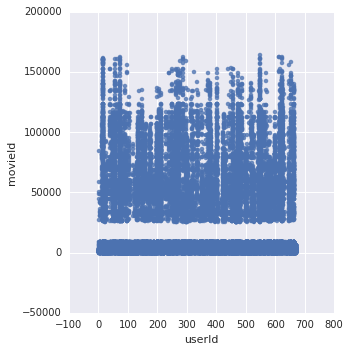

In [45]:
import seaborn as sns
%matplotlib inline

ratingsPandas = ratings.toPandas()
sns.lmplot(x='userId', y='movieId', data=ratingsPandas, fit_reg=False)

This matrix represents all the movies rated by users. Let's improve it by choosing a color palette to color the ratings and zooming on the matrix.

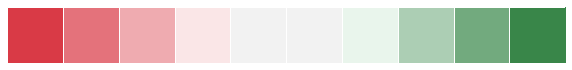

In [46]:
sns.palplot(sns.diverging_palette(10, 133, sep=80, n=10))

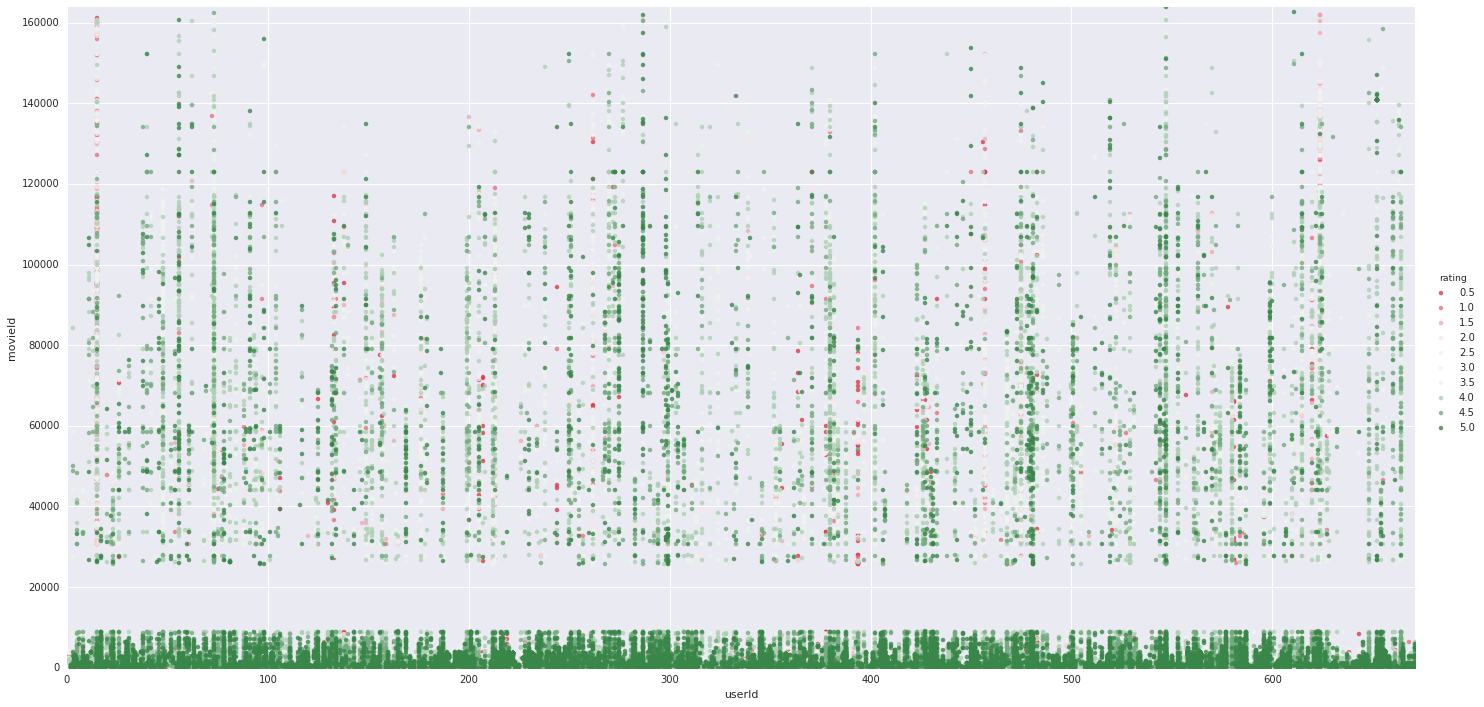

In [47]:
lm = sns.lmplot(x='userId', y='movieId', hue='rating', data=ratingsPandas, fit_reg=False, size=10, aspect=2, palette=sns.diverging_palette(10, 133, sep=80, n=10))
axes = lm.axes
axes[0,0].set_ylim(0,163949) # max movieId is 163949
axes[0,0].set_xlim(0,671) # max userId is 671
lm

On this matrix, you can understand that we are using a subset of the data. Some movies and users are completely missing in this matrix. Also you can identify patterns such as users that are always positive about movies or movies that are rated a lot which could be for different reasons such as a first release of the MovieLens website with a much lighter catalog or most famous movies.

We can also visualize the global distribution of ratings with a violin plot.

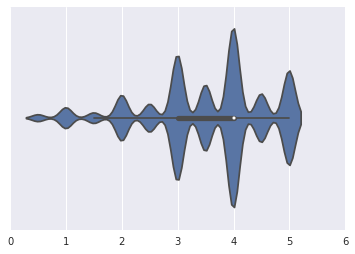

In [48]:
sns.violinplot([ratingsPandas.rating])

Those are very limited examples of what you can achieve with the rich Python visualization libraries ecosystem. Feel free to explore more with the documentations support.

## 5. The recommender system
[Back to the Agenda](#Agenda)

There are [different approachs](https://www.bluepiit.com/blog/2015/11/14/classifying-recommender-systems/) to build a recommender system such as user-based, content-based or collaborative filtering. Collaborative recommender systems aggregate ratings or recommendations of objects, recognize commonalities between the users on the basis of their implicit or explicit ratings and generate new recommendations based on inter-user comparisons. The greatest strength of collaborative techniques is that they are completely independent of any machine-readable representation of the objects being recommended and work well for complex objects where variations in taste are responsible for much of the variation in preferences. Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future and that they will like similar kind of objects as they liked in the past.

ALS, which stands for [Alternating Least Squares](http://dl.acm.org/citation.cfm?id=1608614) is a supervised machine learning algorithm based on matrix factorization to produce product recommendations. This technique aims at filling in the missing entries of a user-item association matrix - the user-movie ratings matrix in our current problem - by factorizing it. The following trivial example gives an idea of the problem to solve but keep in mind that the general problem is way harder since the given matrix is often a sparse matrix with much more missing values.

![User\Product matrix](https://github.com/hatv/dsx_SparkLessons/blob/master/als.png?raw=true "User\Product matrix")

Let's check how sparse is our ratings matrix.

In [49]:
spark.sql("""
    SELECT *, 100 * nb_ratings/matrix_size AS percentage
    FROM (
        SELECT nb_users, nb_movies, nb_ratings, nb_users * nb_movies AS matrix_size
        FROM (
            SELECT COUNT(*) AS nb_ratings, COUNT(DISTINCT(movieId)) AS nb_movies, COUNT(DISTINCT(userId)) AS nb_users
            FROM ratings
        )
    )
""").show()

+--------+---------+----------+-----------+------------------+
|nb_users|nb_movies|nb_ratings|matrix_size|        percentage|
+--------+---------+----------+-----------+------------------+
|     671|     9066|    100004|    6083286|1.6439141608663477|
+--------+---------+----------+-----------+------------------+



There are currently two versions of the Spark Machine Learning library. Spark MLlib is the original RDD Machine Learning API while SparkML provides higher-level API built on top of the DataFrames API for constructing machine learning pipelines. A pipeline consists of a sequence of related transformations and estimations on your data. It makes it easy - for instance - to chain feature extraction, dimensionality reduction, and the training of a classifier into one model, which as a whole can be later used for classification. Feature parity between Spark MLlib and SparkML is expected in Spark 2.2 and MLlib should be deprecated in the future releases and finally removed in Spark 3.x.

We will use SparkML ALS algorithm to train an ALSModel to get recommendations from. The mandatory parameters to the ALS are the columns describing users, items and ratings. The **fit()** method trains the model while the **transform()** method applied on a model scores it and outputs a Spark DataFrame with an additional prediction column. As this algorithm may take some time to compute on a huge dataset, let's monitor this.

In [50]:
from pyspark.ml.recommendation import ALS

import time
start_time = time.time()
model = ALS(userCol="userId", itemCol="movieId", ratingCol="rating").fit(ratings)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.49182081223 seconds ---


In [51]:
predictions = model.transform(ratings)
predictions.show()

+------+-------+------+----------+----------+
|userId|movieId|rating| timestamp|prediction|
+------+-------+------+----------+----------+
|   575|    148|   4.0|1012605106| 3.9296763|
|   380|    463|   3.0| 968949106|  2.994227|
|   534|    463|   4.0| 973377486| 3.8960395|
|   242|    463|   4.0| 956685706|  3.825628|
|   232|    463|   4.0| 955089443| 3.7899709|
|   452|    463|   2.0| 976424451| 2.4852738|
|    30|    463|   4.0| 945277405|  3.694391|
|   311|    463|   3.0| 898008246| 2.8816297|
|    86|    471|   4.0| 848161161|  4.077562|
|   292|    471|   3.5|1140049920| 3.8318632|
|   306|    471|   3.0| 939718996| 3.5498383|
|   491|    471|   3.0| 940797129|  4.143393|
|   309|    471|   4.0|1114565458|  4.087079|
|   607|    471|   4.0|1118247731|   3.54819|
|   659|    471|   4.0| 853412972| 3.5376184|
|   537|    471|   5.0| 879502608|  4.328819|
|   241|    471|   4.0| 847340064|  3.492929|
|   380|    471|   4.0| 949367667| 3.7257679|
|   514|    471|   4.0| 853893788|

After applying a model to a dataset, it is good practice to evaluate the performance of this model by comparing the predicted or estimated values with the original ones. For this purpose, we use an evaluator, in this case, a [RegressionEvaluator](http://spark.apache.org/docs/2.0.2/api/python/pyspark.ml.html#pyspark.ml.evaluation.RegressionEvaluator) that compares continuous values. We can for instance use the [root mean squared error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) which is a classic metric to evaluate model performances that give more weight to predictions further away from the original value.

In [52]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
print "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions))

The root mean squared error for our model is: 0.609128453149


The evaluator is a metric you want to improve across your design iterations to improve the model. But notice that we currently realized the training and the scoring on the exact same dataset, something that won't happen in real life since you always want to predict values you don't already know! This result is thus a nonsense. To be able to accurately evaluate the produced model, it is a common practice in Machine Learning to split the given dataset between a training dataset that will be used to train the model and a test dataset that will be used to compare the predicted results with the original ones and thus to get an idea of the model performances. This is called cross-validation. Not doing it often leads to overfitting which occurs when the produced model is too deeply adjusted on the training dataset and may not perform well on a more general dataset. A general iterative process of Machine Learning is represented on the following picture.

<img src="https://github.com/hatv/dsx_SparkLessons/blob/master/machine-learning.png?raw=true" alt="Machine Learning" style="width: 1000px;"/>

Let's split our ratings dataset between a 80% training dataset and a 20% test dataset and reproduce the fit, predict and evaluate steps.

In [53]:
(trainingRatings, testRatings) = ratings.randomSplit([80.0, 20.0])

In [54]:
als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating")
model = als.fit(trainingRatings)
predictions = model.transform(testRatings)

In [55]:
predictions.show()

+------+-------+------+----------+----------+
|userId|movieId|rating| timestamp|prediction|
+------+-------+------+----------+----------+
|   607|    471|   4.0|1118247731| 3.5080457|
|   585|    471|   4.0| 975363578| 4.3394794|
|   548|    471|   4.0| 857407799| 3.3787918|
|   452|    471|   3.0| 976422396| 3.3879058|
|   649|    471|   3.0| 834425145| 3.7249517|
|    73|    471|   4.0|1296460183| 3.8520334|
|   487|    471|   4.0| 832837388|  3.429093|
|   354|    471|   5.0| 846062674| 4.7934484|
|   508|    471|   4.0| 844377075|   4.02153|
|    30|    471|   4.0| 945112993| 3.7719185|
|   509|    496|   3.0| 940013481| 2.1065333|
|   412|    833|   1.0| 993091607|  2.763353|
|    19|   1088|   3.0| 855193599|  2.854273|
|   607|   1088|   2.0|1148586162| 3.3067539|
|   303|   1088|   3.0|1299437783| 3.0726862|
|   294|   1088|   3.5|1055278624| 3.4696898|
|    15|   1088|   2.0|1122576683|  2.582701|
|   418|   1088|   5.0|1132177250| 3.6431108|
|   160|   1088|   4.0| 974258881|

In [56]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
print "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions))

The root mean squared error for our model is: nan


Depending on the execution, you may get **nan** (not a number) from the previous execution. This is due to [SPARK-14489](https://issues.apache.org/jira/browse/SPARK-14489) and the fact that the model is not able to predict values for users about which it knows nothing at all. A temporary workaround would be to exclude rows with **NaN** predicted values or to replace them with a constant - the general mean rating - for instance. However, to map to a real business problem, the data scientist in collaboration with the business owner must define what happens if such an event occurs, for instance: no recommendation until user rates a few items. Another option could be: until user rates more than 5 items, use the alternative user-based recommender system based on this user's profile (that's an other recommender system to develop).

In [57]:
avgRatings = ratings.select('rating').groupBy().avg().first()[0]
print "The average rating in the dataset is: " + str(avgRatings)

evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
print "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions.na.fill(avgRatings)))

The average rating in the dataset is: 3.54360825567
The root mean squared error for our model is: 0.924501883573


In [58]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
print "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions.na.drop()))

The root mean squared error for our model is: 0.909613314187


Obviously, we get lower performance than with the previous model but we're protected against overfitting: we would actually get this level of performance on new unknown incoming data!

You can also notice that if you execute several times the **randomSplit()**, **fit()**, **transform()** and **evaluate()** functions, you won't always get the same performance. That is because the **randomSplit()** and the **ALS()** have some randomness. To get a more precise performance score, the general idea is to reproduce several times those steps and to compute the average score. This process is really close to what is called the [k-fold cross validation][1].
[1]: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [59]:
def repeatALS(data, k=3, userCol="userId", itemCol="movieId", ratingCol="rating", metricName="rmse"):
    evaluations = []
    for i in range(0, k):  
        (trainingSet, testingSet) = data.randomSplit([k-1.0, 1.0])
        als = ALS(userCol=userCol, itemCol=itemCol, ratingCol=ratingCol)
        model = als.fit(trainingSet)
        predictions = model.transform(testingSet)
        evaluator = RegressionEvaluator(metricName=metricName, labelCol="rating", predictionCol="prediction")
        evaluation = evaluator.evaluate(predictions.na.drop())
        print "Loop " + str(i+1) + ": " + metricName + " = " + str(evaluation)
        evaluations.append(evaluation)
    return sum(evaluations)/float(len(evaluations))

In [60]:
print "RMSE = " + str(repeatALS(ratings, k=4))

Loop 1: rmse = 0.924084349975
Loop 2: rmse = 0.922203029754
Loop 3: rmse = 0.925362871739
Loop 4: rmse = 0.916514996663
RMSE = 0.922041312033


The computed RMSE should be much more stable this way. The only difference between *repeatALS* and *kfoldALS* is that in the k-fold cross validation process, the dataset split between k folds only occurs once and then, the loop is on the split that is used as the testing set while the other splits are used as the training set.

In [61]:
def kfoldALS(data, k=3, userCol="userId", itemCol="movieId", ratingCol="rating", metricName="rmse"):
    evaluations = []
    weights = [1.0] * k
    splits = data.randomSplit(weights)
    for i in range(0, k):  
        testingSet = splits[i]
        trainingSet = spark.createDataFrame(sc.emptyRDD(), data.schema)
        for j in range(0, k):
            if i == j:
                continue
            else:
                trainingSet = trainingSet.union(splits[j])
        als = ALS(userCol=userCol, itemCol=itemCol, ratingCol=ratingCol)
        model = als.fit(trainingSet)
        predictions = model.transform(testingSet)
        evaluator = RegressionEvaluator(metricName=metricName, labelCol="rating", predictionCol="prediction")
        evaluation = evaluator.evaluate(predictions.na.drop())
        print "Loop " + str(i+1) + ": " + metricName + " = " + str(evaluation)
        evaluations.append(evaluation)
    return sum(evaluations)/float(len(evaluations))

In [62]:
print "RMSE = " + str(kfoldALS(ratings, k=4))

Loop 1: rmse = 0.921730823032
Loop 2: rmse = 0.930050213086
Loop 3: rmse = 0.930182412376
Loop 4: rmse = 0.917609221907
RMSE = 0.9248931676


In [71]:
print "RMSE = " + str(kfoldALS(ratings, k=10))

Loop 1: rmse = 0.903215743944
Loop 2: rmse = 0.901186866176
Loop 3: rmse = 0.898804935168
Loop 4: rmse = 0.905769161337
Loop 5: rmse = 0.903027109139
Loop 6: rmse = 0.897242821057
Loop 7: rmse = 0.913705175276
Loop 8: rmse = 0.891579786663
Loop 9: rmse = 0.910495934072
Loop 10: rmse = 0.895363015401
RMSE = 0.902039054823


Notice that the much bigger the training set is, the best performances you should get. This is a general assumption in Machine Learning: more data usually beats better algorithm. You could beat this performance score easily by using the biggest dataset.

In fact, the k-fold cross validation function is available in the SparkML library as [CrossValidator](https://spark.apache.org/docs/2.0.2/ml-tuning.html#cross-validation). So now, how can we improve this model? Every algorithm comes with configuration parameters that are called hyperparameters. Those parameters are specific to every algorithm and the fine tuning of those parameters could help get better results.

For instance, the ALS algorithm signature is the following:
```python
    class pyspark.ml.recommendation.ALS(
        rank=10,
        maxIter=10,
        regParam=0.1,
        numUserBlocks=10,
        numItemBlocks=10,
        implicitPrefs=false,
        alpha=1.0,
        userCol="user",
        itemCol="item",
        seed=None,
        ratingCol="rating",
        nonnegative=false,
        checkpointInterval=10,
        intermediateStorageLevel="MEMORY_AND_DISK",
        finalStorageLevel="MEMORY_AND_DISK"
    )
```

The most important ALS parameters are rank, maxIter and regParam:
- rank is the number of latent factors in the model ;
- maxIter defines the max number of iterations ;
- regParam specifies the regularization parameter.

To test several values for those parameters and choose the best configuration, it is common to define a grid of parameters combinations and to run a grid search over all those combinations, evaluating all the resulting models and comparing the performances. This processed is refered as model selection and the Spark CrossValidator can perform grid search as well as cross validation.

In [75]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

(trainingRatings, validationRatings) = ratings.randomSplit([90.0, 10.0])
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

paramGrid = ParamGridBuilder().addGrid(als.rank, [1, 5, 10]).addGrid(als.maxIter, [20]).addGrid(als.regParam, [0.05, 0.1, 0.5]).build()

crossval = CrossValidator(estimator=als, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)
cvModel = crossval.fit(trainingRatings)
predictions = cvModel.transform(validationRatings)

print "The root mean squared error for our model is: " + str(evaluator.evaluate(predictions.na.drop()))

The root mean squared error for our model is: 0.979599188362


The much folds and parameters you add to the grid, the much longer is the computation that has to test any single combination. The CrossValidatorModel contains more information about the performance for each combination that you can get with the **avgMetrics()** method and could also be represented on a plot to be analyzed. Unfortunately, because of the [SPARK-14489](https://issues.apache.org/jira/browse/SPARK-14489) issue mentioned above, the CrossValidator function is - most of the time - unable to compute the root mean squared error, thus leading to wrong results. This situation may be limited by making the training set huge regarding the test set. It is not a good practice. If you want to learn more about this issue - which is more a conceptual one than a technical one - and how this is being solved in the next Spark 2.2 release, you can have a look at Nick Pentreath pull request [#12896](https://github.com/apache/spark/pull/12896). Welcome to the Open Source world!

## 6. Deal with unstructured data
[Back to the Agenda](#Agenda)

One of the key Spark capabilities is to be able to deal with structured data but also with unstructured data of any type and format. As you noticed, the DataFrame API is really powerful to deal with structured data and it is the recommended API anywhere possible because of the high-level query language and Catalyst cost-based optimizer. But if you want to deal with unstructured data, you have to use the underlying RDD API. So let's read our CSV files as if we don't know about their structure using the SparkContext **textFile()** methode. This method splits the input file into an RDD of strings where each element is a line of the input file. That could be anything from server logs to industry specific formats.

In [95]:
moviesRDD = sc.textFile('swift://' + container_name + '.' + name + '/' + movies_file_name).cache()
ratingsRDD = sc.textFile('swift://' + container_name + '.' + name + '/' + ratings_file_name).cache()

The RDD API is quite rich as well and you can explore the [RDD API documentation](http://spark.apache.org/docs/2.0.2/api/python/pyspark.html#pyspark.RDD) to get more information about method you can use on Spark RDD objects.

In [96]:
print moviesRDD.first()

movieId,title,genres


In [97]:
print ratingsRDD.first()

userId,movieId,rating,timestamp


The *moviesRDD* RDD seems to be in CSV format and it is good to know there is an header. Notice that you don't get a **Row** object like with the DataFrame API but a simple string.   

To understand the data types, you probably want to get more lines. Use the Spark Python API documentation to find out how to retrieve 10 lines from both datasets *ratingsRDD* and *moviesRDD*.

Notice that you probably don't want to retrieve **all lines**. In distributed computation, the dataset could be huge and it's probably a bad thing to retrieve all the data from executors on hundreds of machine to the driver on one single machine.

In [98]:
# Exercice 1: get 10 elements from every dataset
ratings10 = ratingsRDD.take(10) # TODO: get 10 elements
print "--------\nRatings:\n--------"
for r in ratings10:
    print r
movies10 = moviesRDD.take(10) # TODO: get 10 elements
print "\n--------\nMovies:\n--------"
for m in movies10:
    print m

--------
Ratings:
--------
userId,movieId,rating,timestamp
1,31,2.5,1260759144
1,1029,3.0,1260759179
1,1061,3.0,1260759182
1,1129,2.0,1260759185
1,1172,4.0,1260759205
1,1263,2.0,1260759151
1,1287,2.0,1260759187
1,1293,2.0,1260759148
1,1339,3.5,1260759125

--------
Movies:
--------
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


We notice that ratings elements are strings with comma separated values. The values are integers or floats.

About movies, elements are strings with comma separated values. The values are strings, possibly with pipe separated values (for categories).

In [99]:
# Exercice 2: print the number of elements in every dataset
for rdd in moviesRDD, ratingsRDD:
    c = rdd.count() #TODO: number of elements in rdd
    print "RDD '{}' has {} elements.".format(rdd, c)

RDD 'swift://SparkLessons.keystone/MovieLens-Small-movies.csv MapPartitionsRDD[122916] at textFile at NativeMethodAccessorImpl.java:-2' has 9126 elements.
RDD 'swift://SparkLessons.keystone/MovieLens-Small-ratings.csv MapPartitionsRDD[122918] at textFile at NativeMethodAccessorImpl.java:-2' has 100005 elements.


The biggest dataset has 22M+ elements. If we experience computing delays, we may prefer work on the smaller dataset which has 100k+ elements.

This input file probably has a structure or some specific elements that you want to extract from it in order to give your Spark RDD a structure. For example, this CSV file has four attributes: userId, movieId, rating and timestamp. Spark RDDs don't understand the data structure but you can give one to your data by splitting the lines on the comma separator.

Prepare the RDDs by extracting the different fields and removing the header row and the timestamp field. You can also cast the fields in integer and float. Start with the small dataset, check the final RDD with **first()** or **take()** and once it's ok, you can duplicate your work on the bigger dataset. The **map()** method is the RDD's method that you are looking for if you wish to apply a function to any element of an RDD and get another RDD in return.

In [100]:
ratingsRDD_noHeader.first()

u'1,31,2.5,1260759144'

In [101]:
# Exercice 3: prepare the RDDs

# Step 1: remove the header row
moviesRDD_noHeader = moviesRDD.filter(lambda line: 'movieId' not in line) #TODO: Remove the header row from movies
# Check that the new RDD has a row less
print "moviesRDD_noHeader has ", moviesRDD_noHeader.count(), " elements while moviesRDD has ", moviesRDD.count()
ratingsRDD_noHeader = ratingsRDD.filter(lambda line: 'userId' not in line) #TODO: Remove the header row from ratings
# Check that the new RDD has a row less
print "ratingsRDD_noHeader has ", ratingsRDD_noHeader.count(), " elements while ratings has ", ratingsRDD.count()

moviesRDD_noHeader has  9125  elements while moviesRDD has  9126
ratingsRDD_noHeader has  100004  elements while ratings has  100005


In [102]:
# Step 2: split the lines
moviesRDD_split = moviesRDD_noHeader.map(lambda line: line.split(',')) #TODO: Split the lines to get an RDD of arrays of strings
# Check an element of the new RDD
print moviesRDD_split.first()
ratingsRDD_split = ratingsRDD_noHeader.map(lambda line: line.split(',')) #TODO: Split the lines to get an RDD of arrays of strings
# Check an element of the new RDD
print ratingsRDD_split.first()

[u'1', u'Toy Story (1995)', u'Adventure|Animation|Children|Comedy|Fantasy']
[u'1', u'31', u'2.5', u'1260759144']


In [103]:
# Step 3: take the fields you need (ie. remove the timestamp from ratings) and cast them as the appropriate data type
moviesRDD_select = moviesRDD_split.map(lambda line: (int(line[0]), str(line[1]), str(line[2]))) #TODO: Cast the fields to get an RDD of tuples (int, str, str)
# Check an element of the new RDD
print moviesRDD_select.first()
ratingsRDD_select = ratingsRDD_split.map(lambda line: (int(line[0]), int(line[1]), float(line[2]))) #TODO: Cast the required fields to get an RDD of tuples (int, int, float)
# Check an element of the new RDD
print ratingsRDD_select.first()

(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy')
(1, 31, 2.5)


We had a *ratingsRDD* RDD of strings representing lines in our input file. We now have a *ratingsRDD_select* RDD of (integer, integer, float).

In [104]:
# Step 4: apply all those operations at once to the smaller or bigger dataset, you can make a line break in your code by putting an antislash (\) before it

moviesRDD_select = moviesRDD \
    .filter(lambda line: 'movieId' not in line) \
    .map(lambda line: line.split(',')) \
    .map(lambda line: (int(line[0]), str(line[1]), str(line[2]))) #TODO: apply all the above operations at once
# Check an element of the new RDD
print moviesRDD_select.first()

ratingsRDD_select = ratingsRDD \
    .filter(lambda line: 'userId' not in line) \
    .map(lambda line: line.split(',')) \
    .map(lambda line: (int(line[0]), int(line[1]), float(line[2]))) #TODO: apply all the above operations at once
# Check an element of the new RDD
print ratingsRDD_select.first()

(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy')
(1, 31, 2.5)


Even with 22M+ records, the computation with Spark is super fast as long as the dataset can fit in memory. The bigger dataset is "only" 600MB for 22M+ records. Imagine the possibilities with a cluster of ten 128GB RAM nodes for instance.

With those RDDs, it will be easier to answer the two following exercices.

In [105]:
# Exercice 4: how many different users is there in the dataset and how many movies have been rated?
print "Number of different users:", ratingsRDD_select.map(lambda line: line[0]).distinct().count() #TODO
print "Number of different movies that have been rated:", ratingsRDD_select.map(lambda line: line[1]).distinct().count() #TODO

Number of different users: 671
Number of different movies that have been rated: 9066


In [106]:
# Exercice 5: what are the maximum rating and the minimum rating that appear in the dataset?
print "Rating max: ", ratingsRDD_select.map(lambda line: line[2]).max() #TODO
print "Rating min: ", ratingsRDD_select.map(lambda line: line[2]).min() #TODO

Rating max:  5.0
Rating min:  0.5


In [107]:
# Exercice 6: give the full distribution of the ratings, ie. number of occurences of each rating, you can help yourself with the WordCount example
distribution = ratingsRDD_select.map(lambda line: (line[2], 1)).reduceByKey(lambda a, b: a+b) #TODO
# Check the results. You can use collect() because you know that the resulting dataset is small
for tuples in distribution.sortByKey().collect():
    print tuples[0], ": ", tuples[1]

0.5 :  1101
1.0 :  3326
1.5 :  1687
2.0 :  7271
2.5 :  4449
3.0 :  20064
3.5 :  10538
4.0 :  28750
4.5 :  7723
5.0 :  15095


In the previous code, it is important to understand where the code executes. You should take advantage of your Spark's cluster power whenever possible and only manipulates small datasets on the driver single machine.

Notice the distribution of the ratings is not uniform. We can represent it with Matplotlib.

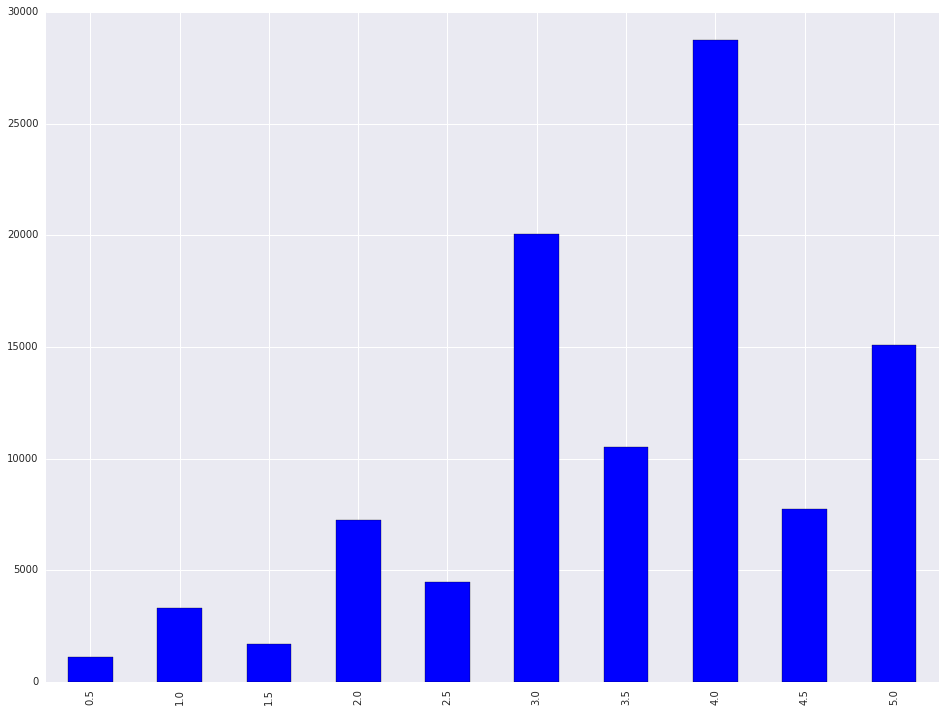

In [108]:
%matplotlib inline

import pandas
distribution_pandas = pandas.DataFrame(distribution.sortByKey().collect(), columns=["rating", "freq"])

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,12));
distribution_pandas['freq'].plot(kind="bar")
ax.set_xticklabels(distribution_pandas['rating']);

Seems users more often rate movies that they like than the one that they don't...

In [109]:
# Exercice 7: split the dataset between a training set and a test set
(training, test) = ratingsRDD_select.randomSplit([0.8, 0.2])
# Check the number of ratings in each RDD
print "Number of ratings in the training dataset: ", training.count()
print "Number of ratings in the test dataset: ", test.count()

Number of ratings in the training dataset:  79969
Number of ratings in the test dataset:  20035


There is also an ALS implementation in the Spark MLlib RDD API.

In [110]:
from pyspark.mllib.recommendation import ALS

model = ALS.train(training, rank=10, iterations=10, lambda_=0.1)

This kind of algorithm can take some time depending on your dataset and cluster sizes. Once the model is trained, we can apply it to the test set from which we remove the actual ratings (blind estimation). Then we join the predictions with the actual ratings and compute the difference.

In [111]:
predictions = model.predictAll(test.map(lambda x: (x[0], x[1])))
print "An example of prediction: ", predictions.first()
predictionsAndRatings = predictions \
    .map(lambda x: ((x[0], x[1]), x[2])) \
    .join(test.map(lambda x: ((x[0], x[1]), x[2])))
print "An example of predictions and ratings: ", predictionsAndRatings.first()

from operator import add
from math import sqrt
n = test.count()
testRMSE = sqrt(predictionsAndRatings.values().map(lambda x: (x[0] - x[1]) ** 2).reduce(add) / float(n))
print "RMSE = ", testRMSE

An example of prediction:  Rating(user=608, product=1084, rating=4.227482494741272)
An example of predictions and ratings:  ((73, 55245), (2.327798663260096, 3.0))
RMSE =  0.894437766387


We can also use the **recommendProducts(user, nb)** method to recommand *nb* products (ie. movies) to a specific user.

In [112]:
model.recommendProducts(10,5)

[Rating(user=10, product=83411, rating=5.594848727293223),
 Rating(user=10, product=67504, rating=5.594848727293223),
 Rating(user=10, product=83359, rating=5.594848727293223),
 Rating(user=10, product=759, rating=5.301930715011599),
 Rating(user=10, product=3677, rating=5.1581128381041275)]

The Spark MLlib RDD API is not as rich as the SparkML DataFrame API so it is recommended to use the SparkML DataFrame API as much as possible.

## 7. To continue your journey with Spark
[Back to the Agenda](#Agenda)

### Comparing to a naive baseline
Does ALS output a non-trivial model? We can compare the evaluation result with a naive baseline model that only outputs the average rating (or you may try one that outputs the average rating per movie). Computing the baseline’s RMSE is straightforward:

In [113]:
meanRating = training.map(lambda x: x[2]).mean()
baselineRMSE = sqrt(test.map(lambda x: (meanRating - x[2]) ** 2).reduce(add) / n)
improvement = (baselineRMSE - testRMSE) / baselineRMSE * 100
print "The baseline RMSE is ", baselineRMSE, ", we improved it by ", improvement, "%"

The baseline RMSE is  1.05634756153 , we improved it by  15.3273222788 %


### Confusion Matrix
It would be a good thing to build a confusion matrix to understand where our model is good and where it is bad, ie. a matrix 10x10 where the lines are the ratings, the columns are the predictions and each cell gives the number of predictions we made in each class (ie. 0.5, 1.0, 1.5, etc.) for each real rating. Thus, the matrix diagonal should ideally contain all the values. This matrix could also be plot as a heatmap through Matplotlib.

### Improve the model

You could try to improve the model by borning the predicted ratings between 0.5 and 5 or using more data like tags or timestamps.   
Use the bigger dataset is also a good option to improve your model performances. Compare the execution time and results.